In [1]:
import json
from selenium.webdriver.chrome.webdriver import WebDriver
from selenium.webdriver.common.desired_capabilities import DesiredCapabilities
url = "https://www.atg.party/"
capabilities = DesiredCapabilities.CHROME.copy()
capabilities['goog:loggingPrefs'] = {'performance': 'ALL'}
browser = WebDriver( desired_capabilities=capabilities)
browser.get(url)
logs = browser.get_log('performance')

[{'level': 'INFO',
  'message': '{"message":{"method":"Network.loadingFinished","params":{"encodedDataLength":0,"requestId":"AF982351E615AA1EBB7C13167FDBDB58","shouldReportCorbBlocking":false,"timestamp":8555.667454}},"webview":"ADF5BBBBB2795DB511650D3B74D2B6E0"}',
  'timestamp': 1623331193937},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.loadEventFired","params":{"timestamp":8555.82748}},"webview":"ADF5BBBBB2795DB511650D3B74D2B6E0"}',
  'timestamp': 1623331193937},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.frameStoppedLoading","params":{"frameId":"ADF5BBBBB2795DB511650D3B74D2B6E0"}},"webview":"ADF5BBBBB2795DB511650D3B74D2B6E0"}',
  'timestamp': 1623331193937},
 {'level': 'INFO',
  'message': '{"message":{"method":"Page.domContentEventFired","params":{"timestamp":8555.82796}},"webview":"ADF5BBBBB2795DB511650D3B74D2B6E0"}',
  'timestamp': 1623331193941},
 {'level': 'INFO',
  'message': '{"message":{"method":"Network.requestWillBeSent","params":{"documen
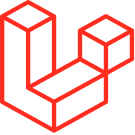
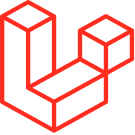

In [2]:
logs

In [3]:
def get_status(logs):
    for log in logs:
        if log['message']:
            d = json.loads(log['message'])
            try:
                content_type = 'text/html' in d['message']['params']['response']['headers']['content-type']
                response_received = d['message']['method'] == 'Network.responseReceived'
                if content_type and response_received:
                    return d['message']['params']['response']['status'],d['message']['params']['response']['responseTime']
            except:
                pass
x=get_status(logs)

In [14]:
x[0]

200

In [6]:
import logging
logging.basicConfig(filename="test.log",level=logging.DEBUG,format='%(message)s')
logging.info("Response Time:"+str(x[1]))

In [7]:
login = browser.find_element_by_xpath("/html/body/header/div[1]/div[2]/div/ul/li[2]/a")
login.click()


In [8]:
username = browser.find_element_by_xpath("//*[@id='email']")
username.send_keys("wiz_saurabh@rediffmail.com")
passw = browser.find_element_by_xpath("//*[@id='password']")
passw.send_keys("Pass@123")


In [9]:
login = browser.find_element_by_xpath("//*[@id='frm_landing_page_user_login']/div[3]/button")
login.click()

In [10]:
browser.get("https://www.atg.party/article")

In [11]:
import os
title = browser.find_element_by_xpath("  //*[@id='title']")  
title.send_keys("Pass@123")
desc = browser.find_element_by_xpath("//*[@id='description']/div/div[1]/div/div/div")    
desc.send_keys("Hello")
photo = browser.find_element_by_xpath("//*[@id='cover_image']")   
photo.send_keys(os.getcwd()+"/hi.jpg")

In [12]:
post = browser.find_element_by_xpath("//*[@id='hpost_btn']")   
post.click()


In [13]:
z=browser.current_url
logging.info(z)